In [1]:
from typing import TypedDict, Literal

In [2]:
class PortfolioSate(TypedDict):
    amount_usd : float
    total_usd : float
    target_currency: Literal['inr', 'eur']
    # Assuming we want to convert to INR, we can add a field for total in INR
    total: float

In [3]:
def calc_total(state:PortfolioSate) -> PortfolioSate:
    state['total_usd'] = state['amount_usd'] * 1.0  # Assuming 1 USD = 1 USD for simplicity
    return state


def convert_to_inr(state: PortfolioSate) -> PortfolioSate:
    state['total'] = state['total_usd'] * 85  # Assuming 1 USD = 85 INR for simplicity
    return state


def convert_to_eur(state: PortfolioSate) -> PortfolioSate:
    state['total'] = state['total_usd'] * 0.85  # Assuming 1 USD = 0.85 EUR for simplicity
    return state

def choose_conversion(state: PortfolioSate) -> str:
    return state['target_currency']

In [4]:
from langgraph.graph import StateGraph, START, END
builder = StateGraph(PortfolioSate)

builder.add_node("calc_total", calc_total)
builder.add_node("convert_to_inr", convert_to_inr)
builder.add_node("convert_to_eur", convert_to_eur)

builder.add_edge(START, "calc_total")
builder.add_conditional_edges(
    "calc_total", 
    choose_conversion,
    {'inr': "convert_to_inr", 'eur': "convert_to_eur"}
)
builder.add_edge(["convert_to_eur", "convert_to_inr"], END)

graph = builder.compile()

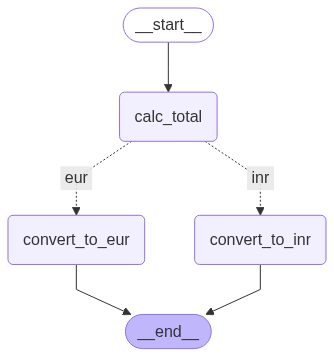

In [5]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
gtest = graph.invoke({"amount_usd": 1000.0, "target_currency": "inr"})  # Example input
print(gtest)    
# This code defines a simple state graph that calculates the total amount in USD and converts it to either INR or EUR based on the target currency specified in the input. The graph is visualized using Mermaid syntax.        



{'amount_usd': 1000.0, 'total_usd': 1000.0, 'target_currency': 'inr', 'total': 85000.0}
